# CSCI2000U - Final Project Proposal


Group 29
Ashar Izhar, Bridget Green, Cameron Millar, Julian Finley

Data Site
https://www.kaggle.com/mazenramadan/imdb-most-popular-films-and-series
    

Description: The dataset is about the ratings of different movies and TV series on IMDB. It includes information such as;
- Name: The Name
- Date: Creation date
- Rate: IMDB's Rating
- Votes: Number of voters
- Genre: The Genre
- Duration: The Duration of the episode , film
- Type: whether it's film or series
- Certificate: The Certificate (TV-Y, PG, PG-13, etc)
- Episodes: Number of episodes for TV series
- How much adult content is present  

This data was collected  using Web Scraping. 


Getting to know your data 

In [1]:
import csv
import re
from functools import reduce
import numpy as np

def get_data_csv():
    collection = []
    with open('imdb.csv', 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# the data    
data = get_data_csv()

In [2]:
import json

#Number of records
print("# of data records:", len (data))

#Date Range
maxYear = max(data, key=lambda item:item['Date'])
minYear = min(data, key=lambda item:item['Date'])
print ("Range in years:", (minYear['Date']), "-", (maxYear['Date']))

#Unique genres by length
uniqueGenres = set(item['Genre'] for item in data)
print("# of unique genres: ", len(uniqueGenres))

#Unique titles by length
uniqueTitles = set(item['Name'] for item in data)
print("# of unique titles: ", len(uniqueTitles))

#Unique titles by type
uniqueFilms = list(filter(lambda item: 'Film' in item['Type'], data))
uniqueSeries = list(filter(lambda item: 'Series' in item['Type'], data))
print("# of unique movies: ", len(uniqueFilms))
print("# of unique shows: ", len(uniqueSeries))

#Unique ratings by length
uniqueRatings = set(item['Rate'] for item in data)
print("# of unique ratings: ", len(uniqueRatings))

#Top 3 records
print("Top 3 records:", json.dumps(data[:3],indent=4),'\n')

# of data records: 6178
Range in years: 1922 - 2023
# of unique genres:  377
# of unique titles:  4820
# of unique movies:  4446
# of unique shows:  1732
# of unique ratings:  77
Top 3 records: [
    {
        "Name": "No Time to Die",
        "Date": "2021",
        "Rate": "7.6",
        "Votes": "107,163",
        "Genre": "Action, Adventure, Thriller",
        "Duration": "163 ",
        "Type": "Film",
        "Certificate": "PG-13",
        "Episodes": "-",
        "Nudity": "Mild",
        "Violence": "Moderate",
        "Profanity": "Mild",
        "Alcohol": "Mild",
        "Frightening": "Moderate"
    },
    {
        "Name": "The Guilty",
        "Date": "2021",
        "Rate": "6.3",
        "Votes": "64,375",
        "Genre": "Crime, Drama, Thriller",
        "Duration": "90 ",
        "Type": "Film",
        "Certificate": "R",
        "Episodes": "-",
        "Nudity": "None",
        "Violence": "None",
        "Profanity": "Severe",
        "Alcohol": "None",
        

We chose this data set because it pertains to movies and TV series, which everyone in the group is already familiar with and interested in. It also has plenty of data to work with, thus we can use the data to ask multiple different questions, and test various hypotheses. There's multiple ways we can see how one variable influenced another, and what conclusions we can come to based on the data.  

We looked at using sets like Utility Cut permits or chemical tracking data for the city of Toronto, but they either didn't have enough data to reasonably work with or weren't interesting to anyone in the group. There was not many questions to be asked, or conclusions to come to. 

Questions:
   - Which genres of movie perform the best across different years?
   - Does the date influence the rating of a movie or TV show??
   - Do TV series or movies perform better? How does this differ over the years? 
   - How does the amount of adult content influence the ratings of a movie?
   - Has there been an increase in any genres over the years? If so, could the ratings have had an influence over this?

We can expect to apply covariance, comparisons and correlation between several different data points.

This could be used to see how trends have changed throughout the years in regards to movies and TV shows. What genres have been more popular and in what years? Are movies/TV shows becoming longer or shorter? Were ratings better back in the day, or now? How could the amount of votes influence the rating of a movie? Are people becoming more critical now, or were people more critical back in the day? 
All these questions can also lead to further questions, such as how and why trends may have changed regarding one of the variables, and how much influence does public opinion have over the production of movies and TV shows. 


In [3]:
import pandas as pd


import csv

from functools import reduce
import numpy as np
import calendar
import string
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [4]:
df = pd.DataFrame(data)
df


,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
6174,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107,Film,Passed,-,None,Mild,None,Mild,Mild
6175,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117,Film,R,-,Severe,Moderate,Severe,Severe,Severe
6176,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100,Film,PG-13,-,None,None,Mild,Moderate,None


In [5]:
df['Genre'].value_counts()[5:]

Action, Crime, Drama            171
Comedy, Drama, Romance          156
Animation, Adventure, Comedy    154
Comedy, Romance                 148
Action, Adventure, Sci-Fi       144
                               ... 
Action, Thriller, War             1
Comedy, Crime, Musical            1
Short, Drama, Romance             1
Animation                         1
Drama, Fantasy, Thriller          1
Name: Genre, Length: 372, dtype: int64

In [175]:
def genreGroup(n):
    
    df3=df[df['Genre'].str.contains(n)==True]
    
    return df3

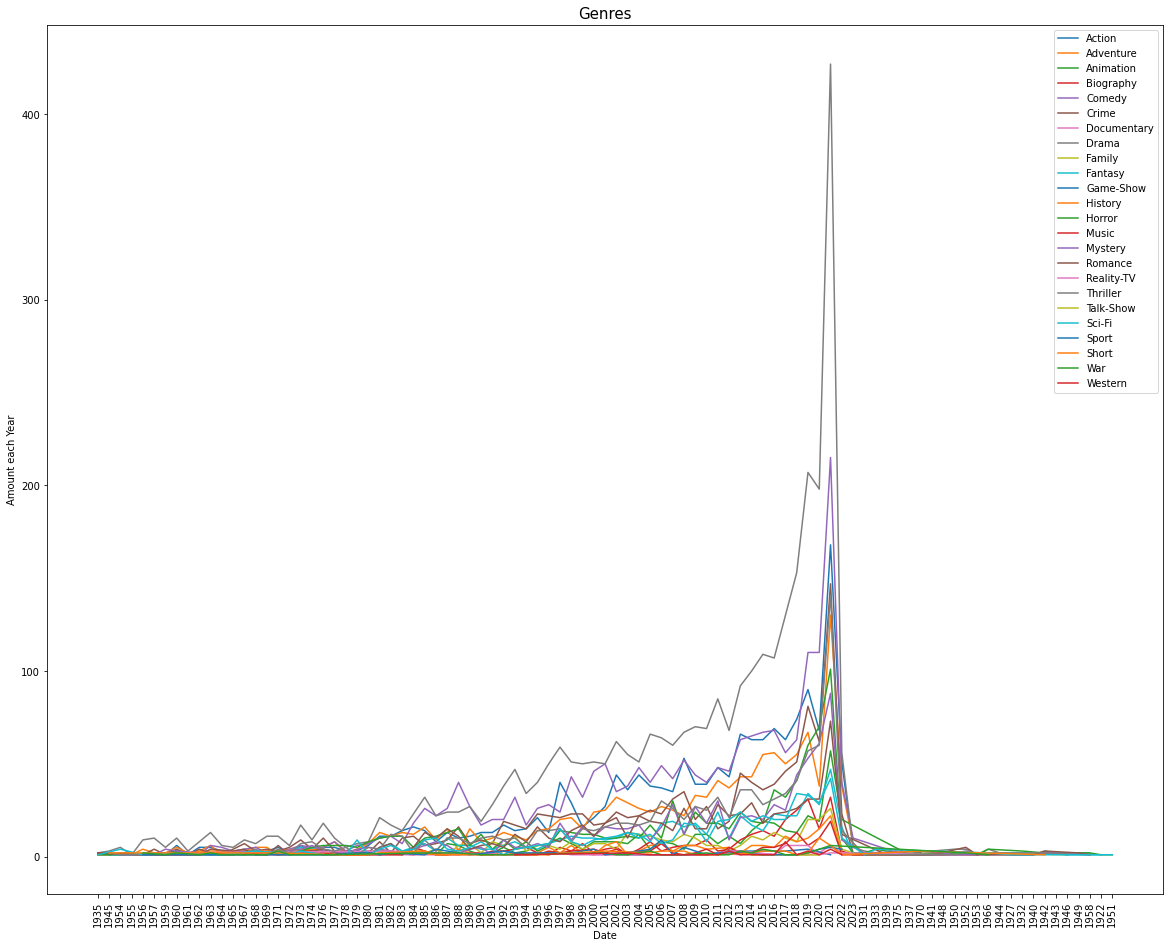

In [176]:


plt.figure(figsize=(20,16))
sns.lineplot(x=((genreGroup("Action")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Action")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Adventure")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Adventure")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Animation")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Animation")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Biography")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Biography")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Comedy")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Comedy")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Crime")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Crime")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Documentary")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Documentary")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Drama")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Drama")).groupby(['Date'])['Genre'].count()).values)


sns.lineplot(x=((genreGroup("Family")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Family")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Fantasy")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Fantasy")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Game-Show")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Game-Show")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("History")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("History")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Horror")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Horror")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Music")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Music")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Mystery")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Mystery")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Romance")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Romance")).groupby(['Date'])['Genre'].count()).values)


sns.lineplot(x=((genreGroup("Reality-TV")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Reality-TV")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Thriller")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Thriller")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Talk-Show")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Talk-Show")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Sci-Fi")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Sci-Fi")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Sport")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Sport")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("War")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("War")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Western")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Western")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Short")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Short")).groupby(['Date'])['Genre'].count()).values)



plt.title("Genres", size=15)
plt.ylabel("Amount each Year")
plt.legend(["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Documentary", "Drama", "Family", "Fantasy", "Game-Show", "History", "Horror", "Music", "Mystery", "Romance", "Reality-TV", "Thriller", "Talk-Show", "Sci-Fi", "Sport", "Short",  "War", "Western"])

plt.xticks(size=10, rotation=90)
plt.show()

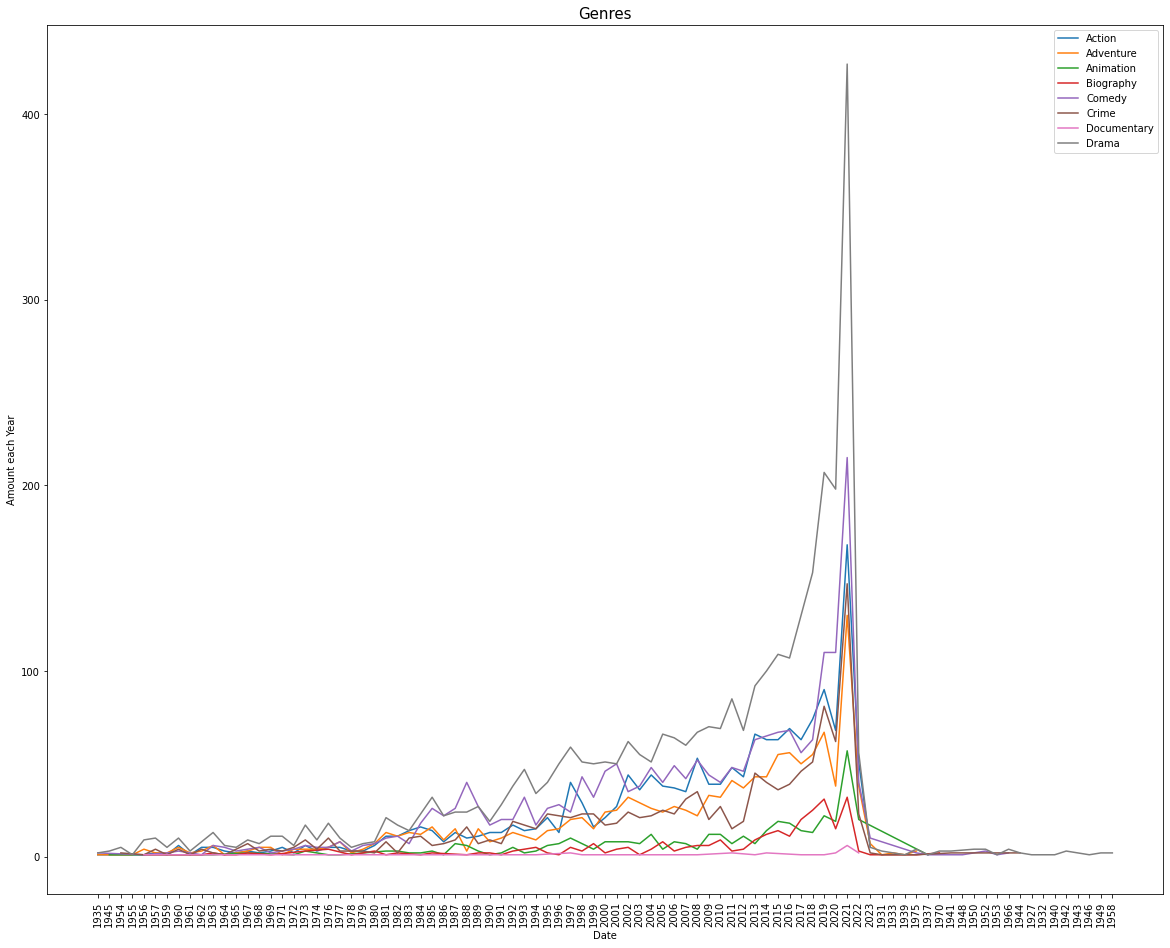

In [177]:



plt.figure(figsize=(20,16))
sns.lineplot(x=((genreGroup("Action")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Action")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Adventure")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Adventure")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Animation")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Animation")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Biography")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Biography")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Comedy")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Comedy")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Crime")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Crime")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Documentary")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Documentary")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Drama")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Drama")).groupby(['Date'])['Genre'].count()).values)





plt.title("Genres", size=15)
plt.ylabel("Amount each Year")
plt.legend(["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Documentary", "Drama"])

plt.xticks(size=10, rotation=90)
plt.show()

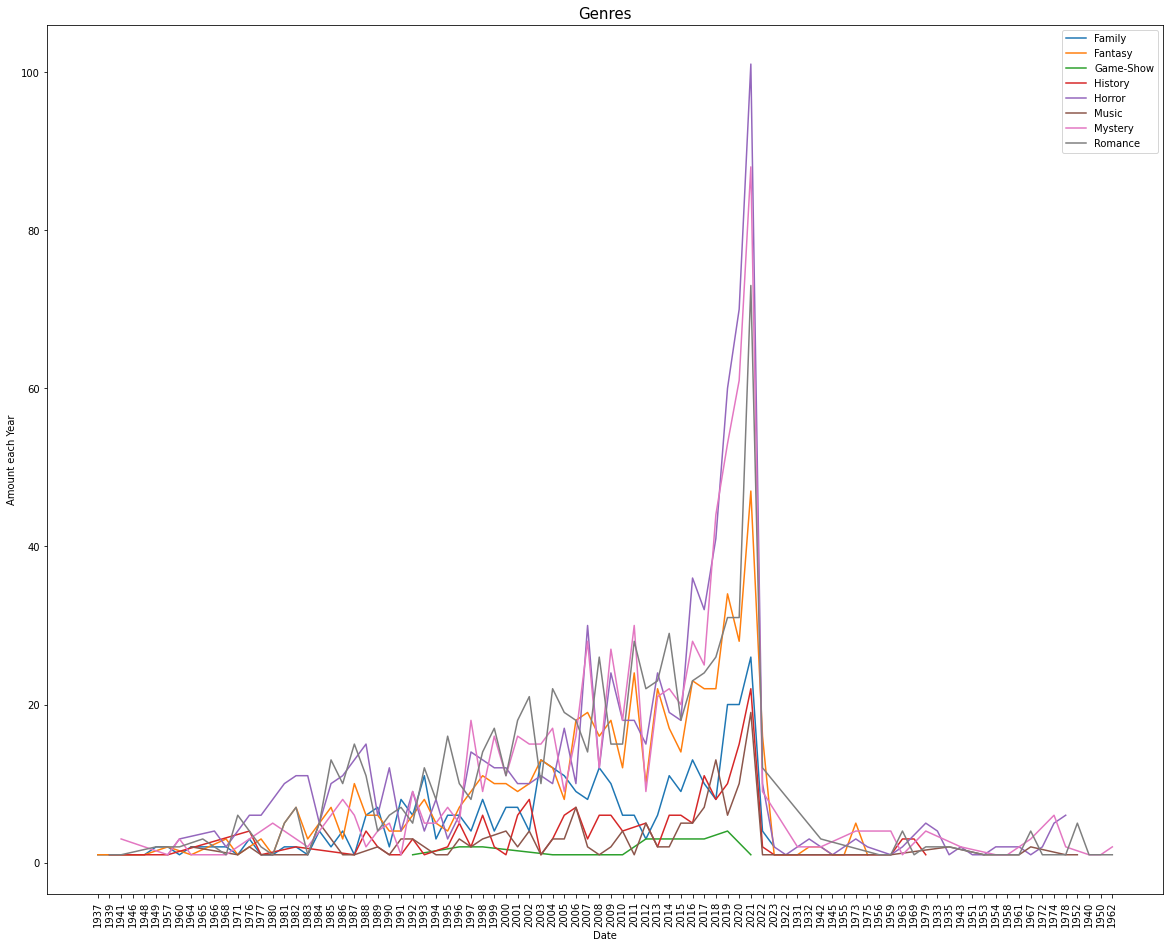

In [178]:


plt.figure(figsize=(20,16))
sns.lineplot(x=((genreGroup("Family")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Family")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Fantasy")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Fantasy")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Game-Show")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Game-Show")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("History")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("History")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Horror")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Horror")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Music")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Music")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Mystery")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Mystery")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Romance")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Romance")).groupby(['Date'])['Genre'].count()).values)



plt.title("Genres", size=15)
plt.ylabel("Amount each Year")
plt.legend(["Family", "Fantasy", "Game-Show", "History", "Horror", "Music", "Mystery", "Romance"])

plt.xticks(size=10, rotation=90)
plt.show()

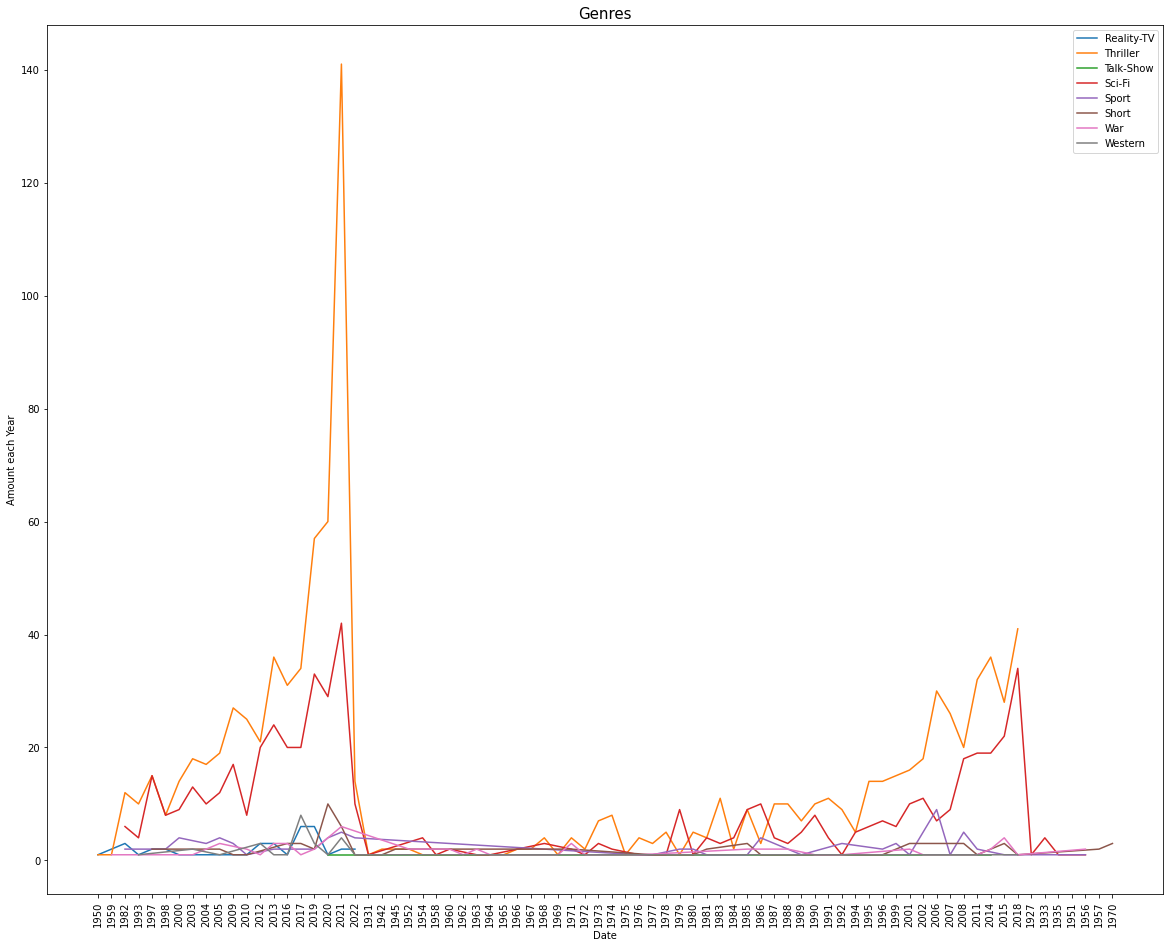

In [179]:



plt.figure(figsize=(20,16))

sns.lineplot(x=((genreGroup("Reality-TV")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Reality-TV")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Thriller")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Thriller")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Talk-Show")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Talk-Show")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Sci-Fi")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Sci-Fi")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Sport")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Sport")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("War")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("War")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Western")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Western")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Short")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Short")).groupby(['Date'])['Genre'].count()).values)



plt.title("Genres", size=15)
plt.ylabel("Amount each Year")
plt.legend(["Reality-TV", "Thriller", "Talk-Show", "Sci-Fi", "Sport", "Short" ,"War", "Western"])

plt.xticks(size=10, rotation=90)
plt.show()

<AxesSubplot:xlabel='Date'>

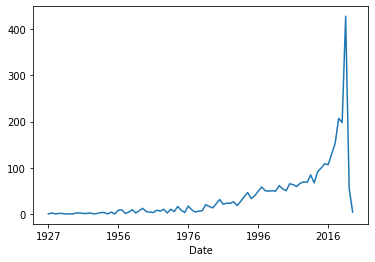

In [180]:
#drama ratings 

drama=(genreGroup("Drama"))
t1=drama.groupby('Date')['Rate'].count()
t1.plot()

<AxesSubplot:xlabel='Date'>

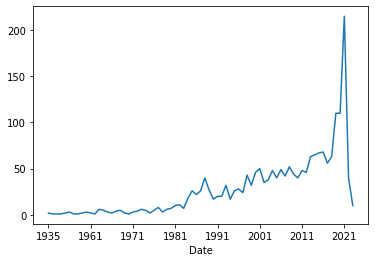

In [181]:
comedy=(genreGroup("Comedy"))
t2=comedy.groupby('Date')['Rate'].count()
t2.plot()

<AxesSubplot:xlabel='Date'>

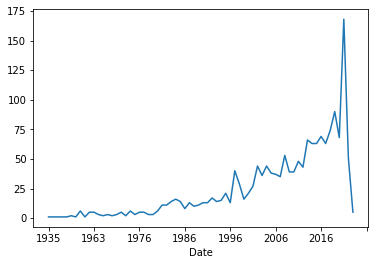

In [182]:
action=(genreGroup("Action"))
t3=action.groupby('Date')['Rate'].count()
t3.plot()

<AxesSubplot:xlabel='Date'>

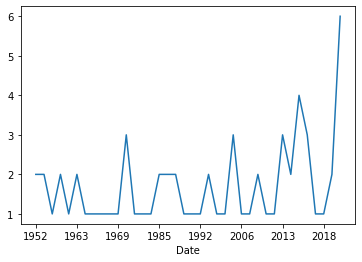

In [183]:
western=(genreGroup("Western"))
t4=western.groupby('Date')['Rate'].count()
t4.plot()

<AxesSubplot:xlabel='Date'>

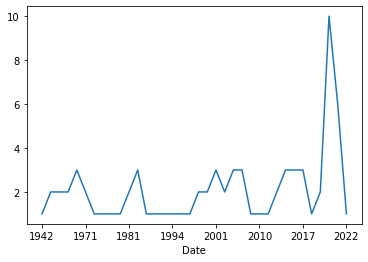

In [184]:
war=(genreGroup("War"))
t5=war.groupby('Date')['Rate'].count()
t5.plot()

<AxesSubplot:xlabel='Date'>

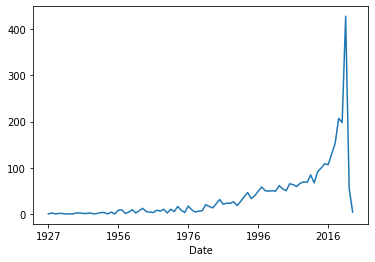

In [185]:

t1=drama.groupby('Date')['Votes'].count()
t1.plot()

<AxesSubplot:xlabel='Date'>

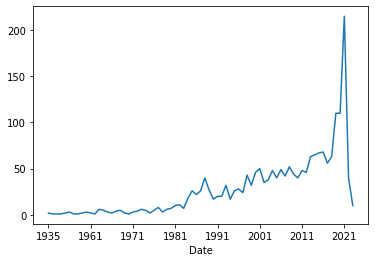

In [186]:
t2=comedy.groupby('Date')['Votes'].count()
t2.plot()

<AxesSubplot:xlabel='Date'>

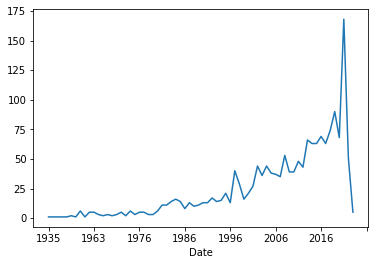

In [187]:
t3=action.groupby('Date')['Votes'].count()
t3.plot()

<AxesSubplot:xlabel='Date'>

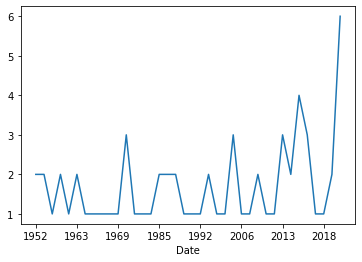

In [188]:
t4=western.groupby('Date')['Votes'].count()
t4.plot()

<AxesSubplot:xlabel='Date'>

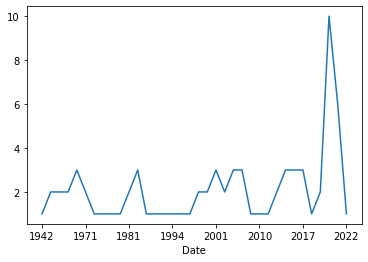

In [189]:
t5=war.groupby('Date')['Votes'].count()
t5.plot()

<AxesSubplot:xlabel='Date'>

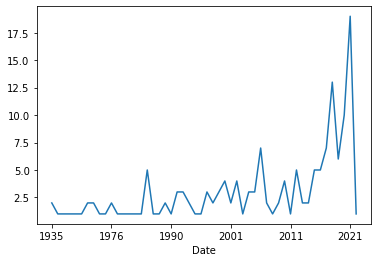

In [190]:
thriller=(genreGroup("Thriller"))
t6A=thriller.groupby('Date')['Rate'].count()
t6.plot()


<AxesSubplot:xlabel='Date'>

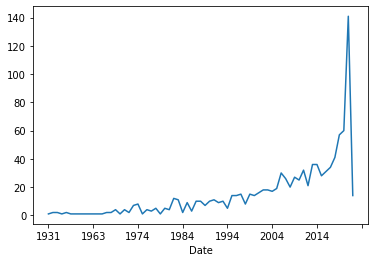

In [191]:
t6=thriller.groupby('Date')['Votes'].count()
t6.plot()